In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision as torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 128
learning_rate = 0.001
num_epochs = 6

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.ImageFolder('C:/Users/marki/Desktop/sign_language_for_numbers/train_numbers', transform=train_transforms)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = datasets.ImageFolder('C:/Users/marki/Desktop/sign_language_for_numbers/test_numbers', transform=test_transforms)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 11)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the {total} test images: {accuracy:.2f} %')


Epoch [1/6], Step [10/91], Loss: 2.2284
Epoch [1/6], Step [20/91], Loss: 2.0183
Epoch [1/6], Step [30/91], Loss: 1.7105
Epoch [1/6], Step [40/91], Loss: 1.4349
Epoch [1/6], Step [50/91], Loss: 1.3309
Epoch [1/6], Step [60/91], Loss: 1.0104
Epoch [1/6], Step [70/91], Loss: 0.8657
Epoch [1/6], Step [80/91], Loss: 0.8557
Epoch [1/6], Step [90/91], Loss: 0.6818
Accuracy of the model on the 4950 test images: 60.61 %
Epoch [2/6], Step [10/91], Loss: 0.6082
Epoch [2/6], Step [20/91], Loss: 0.5752
Epoch [2/6], Step [30/91], Loss: 0.5070
Epoch [2/6], Step [40/91], Loss: 0.5755
Epoch [2/6], Step [50/91], Loss: 0.7314
Epoch [2/6], Step [60/91], Loss: 0.5615
Epoch [2/6], Step [70/91], Loss: 0.4635
Epoch [2/6], Step [80/91], Loss: 0.5798
Epoch [2/6], Step [90/91], Loss: 0.5868
Accuracy of the model on the 4950 test images: 62.32 %
Epoch [3/6], Step [10/91], Loss: 0.3589
Epoch [3/6], Step [20/91], Loss: 0.4020
Epoch [3/6], Step [30/91], Loss: 0.4497
Epoch [3/6], Step [40/91], Loss: 0.3057
Epoch [3/6

Test Accuracy: 0.9457


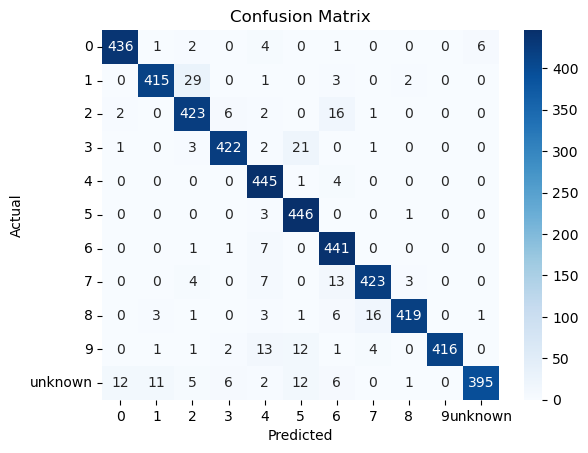

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       450
           1       0.96      0.92      0.94       450
           2       0.90      0.94      0.92       450
           3       0.97      0.94      0.95       450
           4       0.91      0.99      0.95       450
           5       0.90      0.99      0.95       450
           6       0.90      0.98      0.94       450
           7       0.95      0.94      0.95       450
           8       0.98      0.93      0.96       450
           9       1.00      0.92      0.96       450
     unknown       0.98      0.88      0.93       450

    accuracy                           0.95      4950
   macro avg       0.95      0.95      0.95      4950
weighted avg       0.95      0.95      0.95      4950



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds += predicted.tolist()
        all_labels += labels.tolist()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    # Calculate the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Get the class names
    class_names = test_data.classes

    # Create a heatmap plot
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

    # Add labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

    

    report = classification_report(all_labels, all_preds, target_names=test_data.classes)
    print('Classification Report:')
    print(report)
